# HW #1: Visualization and Analysis

**Edwin Ramirez & Darshil Desai <br> 
January 2019**

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame
import os

#set the working directory
os.chdir('./suicide-rates-overview-1985-to-2016')

path = os.getcwd()
print(path)

C:\Users\edalr\Desktop\school\dataviz\homework\anlt232_hw1\suicide-rates-overview-1985-to-2016


## Overview

This report focuses on exploring the _Suicide Rates Overview 1985 to 2016_ dataset sourced from [Kaggle](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016), which  is a compiled dataset from three separate sources. These sources include the [United Nations Development Program](http://hdr.undp.org/en/indicators/137506) and [World Bank](https://databank.worldbank.org/data/source/world-development-indicators#) for socioeconomic data, and the [World Health Organization](https://www.who.int/mental_health/prevention/suicide/suicideprevent/en/) for suicide data. Brielfy we will explore: 

1. Relationships between a country's economic growth vs the average suicide rate over time

    Due to the fact that the current dataset contains data comprising over 100 countries, we limit this particular analysis to 4 countries wherein 2 will possess high GDP per capita and the other 2 will be among the lowest. Consequentially we end up picking United States, Sweden, Armenia, Albania
([Reference](https://www.oecd-ilibrary.org/economics/oecd-factbook-2010/suicide-rates-and-per-capita-gdp_factbook-2010-graph260-en)


2. Varying trends between male and female suicide rate over time


3. Relationships between a countrys economic growth and consequent changes in male/female suicide rates 


4. Compare the chages in suicide rates for each generation over time

5. idk...
...

In [3]:
data = DataFrame(pd.read_csv("master.csv"))
col_names = list(data.columns.values)
print(col_names)

['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']


## Cleaning 

- Drop _HDI for year_ which conveys information on the human development index. We do this due to the absence of over 50% of the missing data in the column

- Convert _gdp-for-year_ into a numeric column

-OTHER THINGS

In [4]:
#removing the HDI for year column
try:
    data  = data.drop(['HDI for year'])
except:
    print ('Column alredy dropped!')
    
#converting gdp_for_year column into a numeric one
data[' gdp_for_year ($) '] = data[' gdp_for_year ($) '].str.replace(',','')

Column alredy dropped!


<h4><font color="blue" size = 4>Our Data</font></h4>

Our variables are as follows: 
- **country:** The country associated with the suicide record

- **year:** The year associated with the suicide record

- **sex:** The sex of the individual pertaining to the suicide record

- **suicides_no:** Number of suicides 

- **population:** Total population 

- **suicides/100k pop:** Number of suicides per 100K population  
- **gdp_per_year:** GDP value pertaining to the year of the record
- **gdp_per_capita:** GDP per caputa value pertaining to the year of the record
- **generation:** Specifies which one of the 6 generation groups the record belongs to 

In [5]:
#viewing our data
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [6]:
#Basic analysis 
age_groups = pd.DataFrame(data['age'].value_counts(dropna=False)).sort_values('age')
gen = pd.DataFrame(data['generation'].value_counts(dropna=False))
countries = pd.DataFrame(data['country'].value_counts(dropna=False))
gender = pd.DataFrame(data['sex'].value_counts(dropna=False))

# Some Group-bys to help with certain visualizations

# Average GDP_per_capita per country per year
data.groupby(['country', 'year'])['gdp_per_capita ($)'].mean()

#Average number of suicides per country per year
aa = pd.DataFrame(data.groupby(['country', 'year'])['suicides_no','gdp_per_capita ($)' ].mean())

#distrubution ofage brackets per country
count_age  = data.groupby(['country', 'age'])['age'].count()

# Average population per country in 100s
avg_pop_bycountry = round(pd.DataFrame(data.groupby(['country'])['population'].mean())/100,0)

#average GDP value in the following countries: United States|Sweden|Sri Lanka|Armenia|Albania
gdp_per_country = round(pd.DataFrame(data[data['country'].str.contains('United States|Sweden|Sri Lanka|Armenia|Albania')].groupby(['country'])['gdp_per_capita ($)'].mean())/100,0)

selected_countries = data[data['country'].str.contains('United States|Sweden|Sri Lanka|Armenia|Albania')]       

## Visualizing our dataset

- Some basic visuals showcasing the type of data we have etc etc 

([<matplotlib.patches.Wedge at 0x1b637bee080>,
 [Text(0.9542798640710528, 0.5471288157541451, '5-14 years'),
  Text(0.005962441024175203, 1.099983840470865, '25-34 years'),
  Text(-0.9503007467574252, 0.5540112730913338, '15-24 years'),
  Text(-0.9542798640710528, -0.5471288157541452, '75+ years'),
  Text(-0.001987488992416983, -1.0999982044928551, '55-74 years'),
  Text(0.9522965230644779, -0.550573639179453, '35-54 years')])

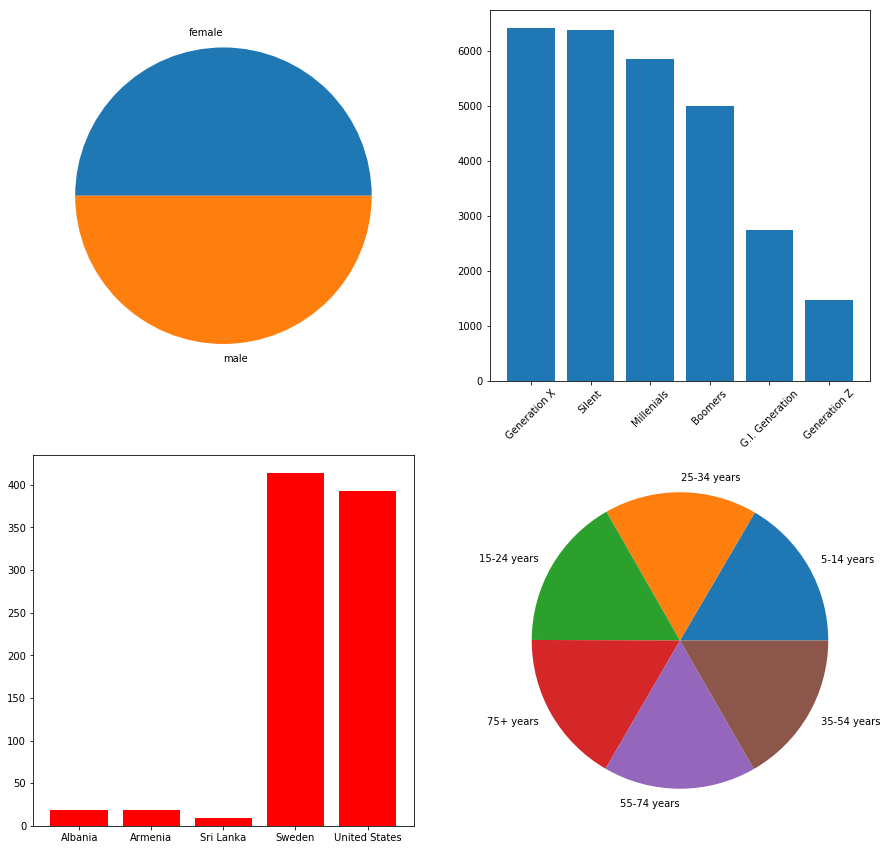

In [7]:
plt.figure(figsize=(15,15))

#Proportion of overall male vs female
plt.subplot(2,2,1)
plt.pie(gender, labels =list(gender.index) )

# Distrubution of diff generations
plt.subplot(2,2,2)
plt.xticks(rotation=45)
plt.bar(list(gen.index),gen['generation'])

# Comparing mean GDP across selected countries
plt.subplot(2,2,3)
plt.bar(list(gdp_per_country.index),gdp_per_country['gdp_per_capita ($)'], color='red')

#
plt.subplot(2,2,4)
plt.pie(age_groups['age'], labels = list(age_groups.index))

## Examining Claim 1 

: Here we will try and determine the strength of the relationship between a countrys' economic growth (measured by the GDP per capita) and the the average suicide rate over time. 

Briefly:
- (i) We will compare and examine the changing average global GDP per capita and the resultant suicide rate over the years
- (ii) Following which we will compare the same metrics but between countries with a high GDP and countries with low GDP. 

It may be worth to hypothesize that economic downturn in wealthier countries may yield to proportionally less hardship amongst its constutuents. Whereas constituents of poorer countries may not experience economic downturn with relative ease

### (i) Add text exploring claim 1

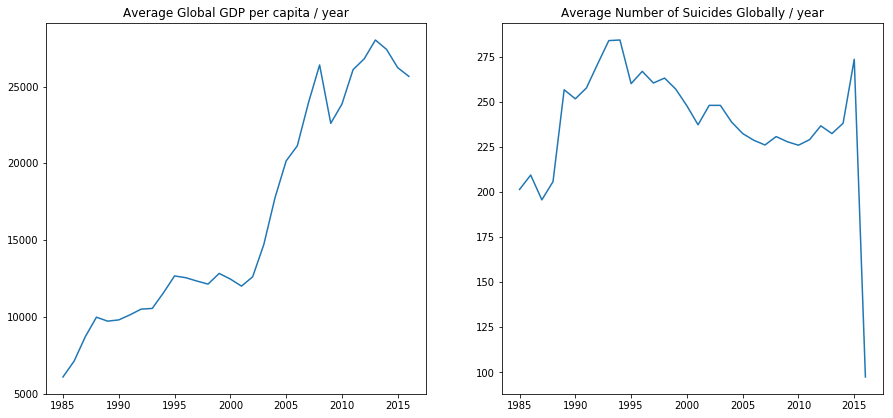

In [8]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.title('Average Global GDP per capita / year')
plt.plot(data.groupby('year')['gdp_per_capita ($)'].mean())

plt.subplot(2,2,2)
plt.title('Average Number of Suicides Globally / year')
plt.plot(data.groupby('year')['suicides_no'].mean())


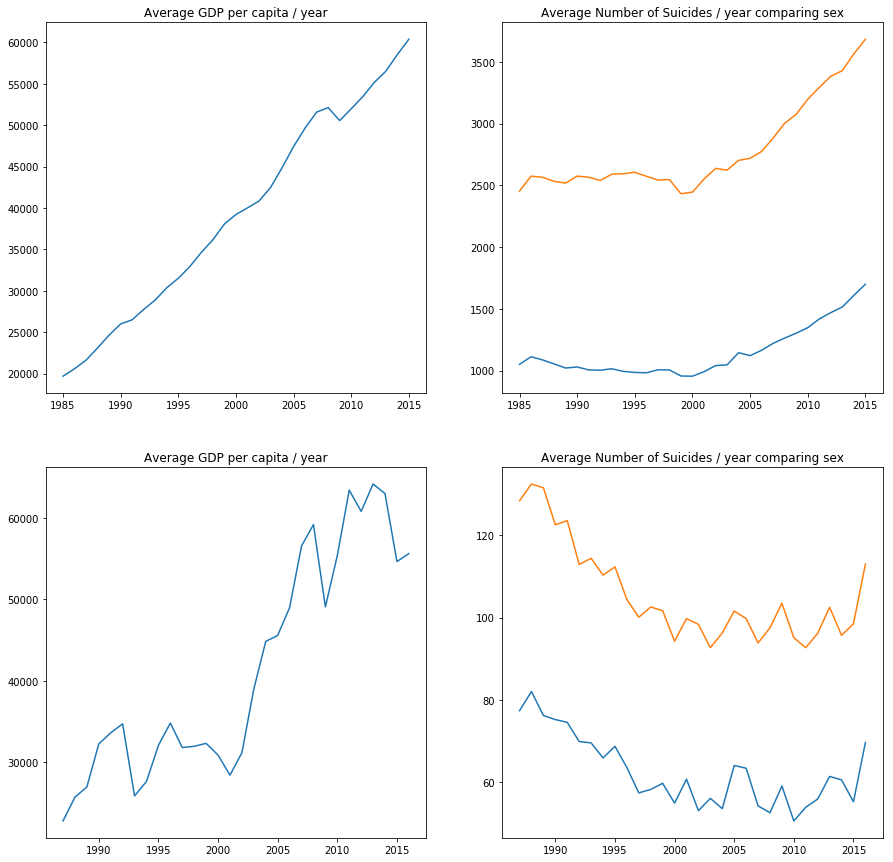

In [9]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.title('Average GDP per capita / year')
plt.plot(data[data['country'].str.contains('United States')].groupby('year')['gdp_per_capita ($)'].mean())

plt.subplot(2,2,2)
plt.title('Average Number of Suicides / year comparing sex')
plt.plot(data[(data['country'].str.contains('United States')) 
             & (data['sex'].str.contains('female', case=False))].groupby('year')['suicides_no'].mean())
plt.plot(data[(data['country'].str.contains('United States')) 
             & (data['sex'].str.contains('male', case=False))].groupby('year')['suicides_no'].mean())


plt.subplot(2,2,3)
plt.title('Average GDP per capita / year')
plt.plot(data[data['country'].str.contains('Sweden')].groupby('year')['gdp_per_capita ($)'].mean())

plt.subplot(2,2,4)
plt.title('Average Number of Suicides / year comparing sex')
plt.plot(data[(data['country'].str.contains('Sweden')) 
             & (data['sex'].str.contains('female', case=False))].groupby('year')['suicides_no'].mean())
plt.plot(data[(data['country'].str.contains('Sweden')) 
             & (data['sex'].str.contains('male', case=False))].groupby('year')['suicides_no'].mean())

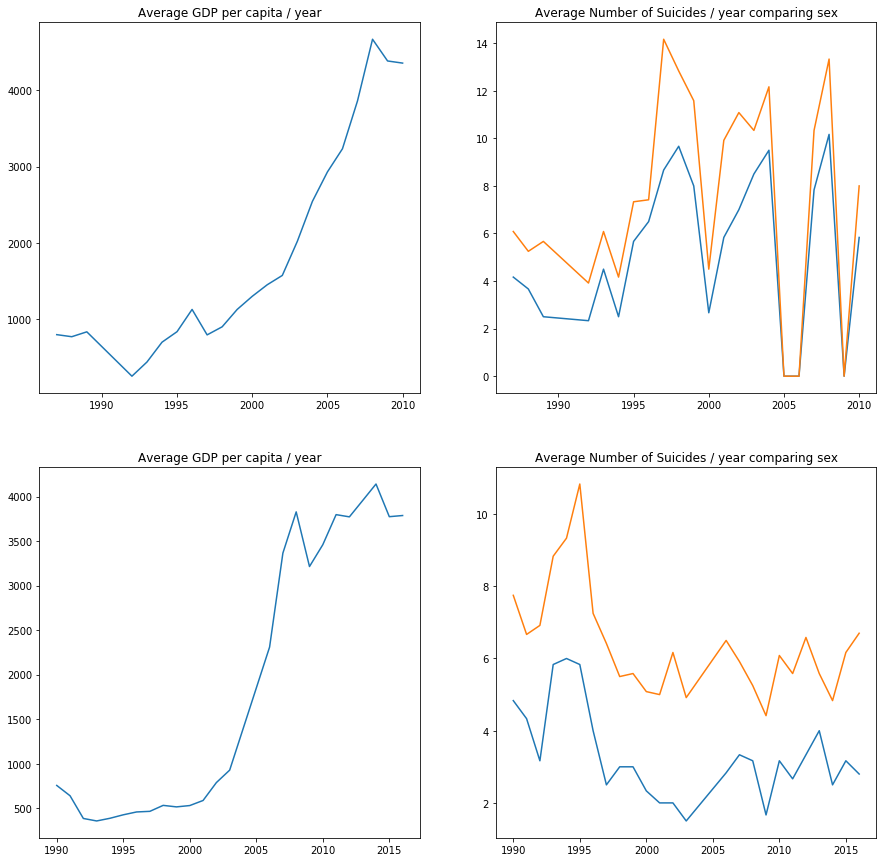

In [10]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.title('Average GDP per capita / year')
plt.plot(data[data['country'].str.contains('Albania')].groupby('year')['gdp_per_capita ($)'].mean())

plt.subplot(2,2,2)
plt.title('Average Number of Suicides / year comparing sex')
plt.plot(data[(data['country'].str.contains('Albania')) 
             & (data['sex'].str.contains('female', case=False))].groupby('year')['suicides_no'].mean())
plt.plot(data[(data['country'].str.contains('Albania')) 
             & (data['sex'].str.contains('male', case=False))].groupby('year')['suicides_no'].mean())


plt.subplot(2,2,3)
plt.title('Average GDP per capita / year')
plt.plot(data[data['country'].str.contains('Armenia')].groupby('year')['gdp_per_capita ($)'].mean())

plt.subplot(2,2,4)
plt.title('Average Number of Suicides / year comparing sex')
plt.plot(data[(data['country'].str.contains('Armenia')) 
             & (data['sex'].str.contains('female', case=False))].groupby('year')['suicides_no'].mean())
plt.plot(data[(data['country'].str.contains('Armenia')) 
             & (data['sex'].str.contains('male', case=False))].groupby('year')['suicides_no'].mean())

## Exploring other claims etc etc insert stuff here

Get only US data... group by generation and suicides/100k pop...take the totals of suicides per generation in 10 year increments. 

In [25]:
US_data = selected_countries.loc[selected_countries['country'] == "United States",]

In [81]:
US_gen1 = US_data.loc[US_data['year'] < 1996,] 
US_gen1 = pd.DataFrame(US_gen1.groupby('generation')['suicides/100k pop'].sum())

US_gen2 = US_data.loc[(US_data['year'] > 1995) & (US_data['year'] < 2006),] 
US_gen2 = pd.DataFrame(US_gen2.groupby('generation')['suicides/100k pop'].sum())

US_gen3 = US_data.loc[(US_data['year'] > 2005) & (US_data['year'] < 2016),]
US_gen3 = pd.DataFrame(US_gen3.groupby('generation')['suicides/100k pop'].sum())

In [67]:
SW_data = selected_countries.loc[selected_countries['country'] == "Sweden",]

SW_gen1 = SW_data.loc[SW_data['year'] < 1996,] 
SW_gen1 = pd.DataFrame(SW_gen1.groupby('generation')['suicides/100k pop'].sum())

SW_gen2 = SW_data.loc[(SW_data['year'] > 1995) & (SW_data['year'] < 2006),] 
SW_gen2 = pd.DataFrame(SW_gen2.groupby('generation')['suicides/100k pop'].sum())

SW_gen3 = SW_data.loc[(SW_data['year'] > 2005) & (SW_data['year'] < 2016),] 
SW_gen3 = pd.DataFrame(SW_gen3.groupby('generation')['suicides/100k pop'].sum())

In [68]:
AL_data = selected_countries.loc[selected_countries['country'] == "Albania",]

AL_gen1 = AL_data.loc[AL_data['year'] < 1996,] 
AL_gen1 = pd.DataFrame(AL_gen1.groupby('generation')['suicides/100k pop'].sum())

AL_gen2 = AL_data.loc[(AL_data['year'] > 1995) & (AL_data['year'] < 2006),] 
AL_gen2 = pd.DataFrame(AL_gen2.groupby('generation')['suicides/100k pop'].sum())

AL_gen3 = AL_data.loc[(AL_data['year'] > 2005) & (AL_data['year'] < 2016),] 
AL_gen3 = pd.DataFrame(AL_gen3.groupby('generation')['suicides/100k pop'].sum())

In [69]:
AR_data = selected_countries.loc[selected_countries['country'] == "Armenia",]

AR_gen1 = AR_data.loc[AR_data['year'] < 1996,] 
AR_gen1 = pd.DataFrame(AR_gen1.groupby('generation')['suicides/100k pop'].sum())

AR_gen2 = AR_data.loc[(AR_data['year'] > 1995) & (AR_data['year'] < 2006),] 
AR_gen2 = pd.DataFrame(AR_gen2.groupby('generation')['suicides/100k pop'].sum())

AR_gen3 = AR_data.loc[(AR_data['year'] > 2005) & (AR_data['year'] < 2016),] 
AR_gen3 = pd.DataFrame(AR_gen3.groupby('generation')['suicides/100k pop'].sum())

In [100]:
US_gen1

,suicides/100k pop
generation,
Boomers,454.32
G.I. Generation,883.74
Generation X,326.70
Millenials,8.31
Silent,342.69


In [108]:
SW_gen1

,suicides/100k pop
generation,
Boomers,509.80
G.I. Generation,788.28
Generation X,217.15
Millenials,3.12
Silent,411.32


In [103]:
AL_gen1

,suicides/100k pop
generation,
Boomers,48.78
G.I. Generation,62.91
Generation X,63.65
Millenials,2.99
Silent,42.67


In [109]:
AR_gen1

,suicides/100k pop
generation,
Boomers,71.38
G.I. Generation,117.52
Generation X,31.75
Millenials,1.05
Silent,75.72


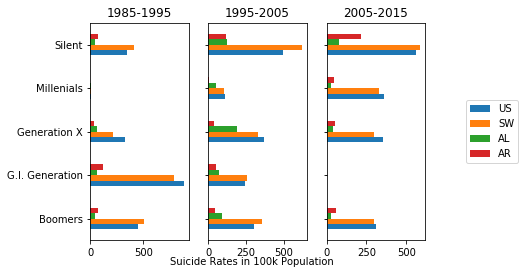

In [153]:
index = ['Boomers', 'G.I. Generation', 'Generation X', 'Millenials', 'Silent']
gen1_df = pd.DataFrame({'US': US_gen1.iloc[:,0],
                        'SW': SW_gen1.iloc[:,0],
                        'AL': AL_gen1.iloc[:,0],
                        'AR': AR_gen1.iloc[:,0]}, index=index)

gen2_df = pd.DataFrame({'US': US_gen2.iloc[:,0],
                        'SW': SW_gen2.iloc[:,0],
                        'AL': AL_gen2.iloc[:,0],
                        'AR': AR_gen2.iloc[:,0]}, index=index)


gen3_df = pd.DataFrame({'US': US_gen3.iloc[:,0],
                        'SW': SW_gen3.iloc[:,0],
                        'AL': AL_gen3.iloc[:,0],
                        'AR': AR_gen3.iloc[:,0]}, index=index)

fig, (ax,ax2,ax3) = plt.subplots(ncols = 3, sharey=True)

gen1_df.plot.barh(ax=ax, legend=False, title = "1985-1995")
gen2_df.plot.barh(ax=ax2, legend=False, title = "1995-2005")
gen3_df.plot.barh(ax=ax3, legend=False, title = "2005-2015")

ax3.legend(bbox_to_anchor=(2, 0.5), loc='right', ncol=1)
fig.text(0.5, 0.04, 'Suicide Rates in 100k Population', ha='center')
plt.show()